In [1]:
# Configuracion para recargar módulos y librerías 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# MAT281

## Aplicaciones de la Matemática en la Ingeniería

Puedes ejecutar este jupyter notebook de manera interactiva:

[![Binder](../shared/images/jupyter_binder.png)](https://mybinder.org/v2/gh/sebastiandres/mat281_m04_data_science/master?filepath=06_clustering/06_clustering.ipynb)

[![Colab](../shared/images/jupyter_colab.png)](https://colab.research.google.com/github/sebastiandres/mat281_m04_data_science/blob/master//06_clustering/06_clustering.ipynb)

## ¿Qué contenido aprenderemos?
**Clustering!** En palabras simples: agrupar registros **sin etiqueta previa**.

## Motivación: Iris Dataset

Buscaremos ilustrar los distintos algoritmos con datos reales. Un conjunto de datos interesante y **_versatil_** es el Iris Dataset.

#### Recuerdo: 
El conjunto de datos consiste en 50 muestras de 3 especies de Iris (Iris setosa, Iris virginica y Iris versicolor). 
Para cada flor, se midieron 4 características: largo y ancho de los petalos, y largo y ancho de los sépalos, en centímetros.

## Iris Dataset

<img src="images/iris_petal_sepal.png" alt="" width="600px" align="middle"/>

#### Iris Dataset
## Exploracion de datos

In [2]:
import altair as alt
from vega_datasets import data

iris_df = data.iris()
iris_df.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


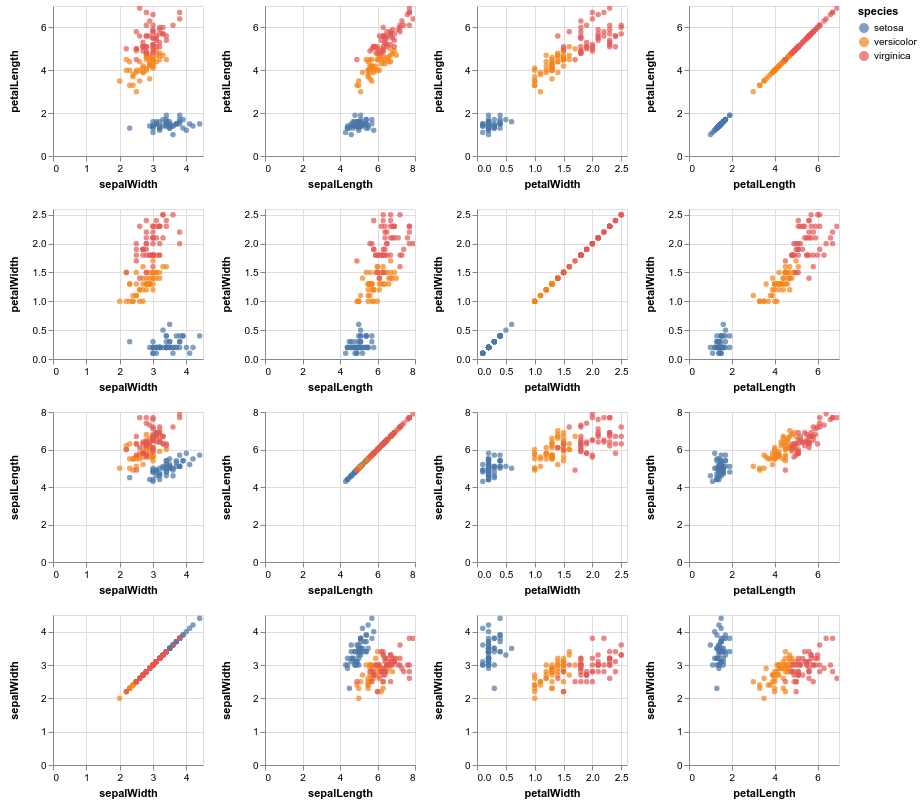

In [3]:
alt.Chart(iris_df).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='species:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['petalLength', 'petalWidth', 'sepalLength', 'sepalWidth'],
    column=['sepalWidth', 'sepalLength', 'petalWidth', 'petalLength']
).interactive()

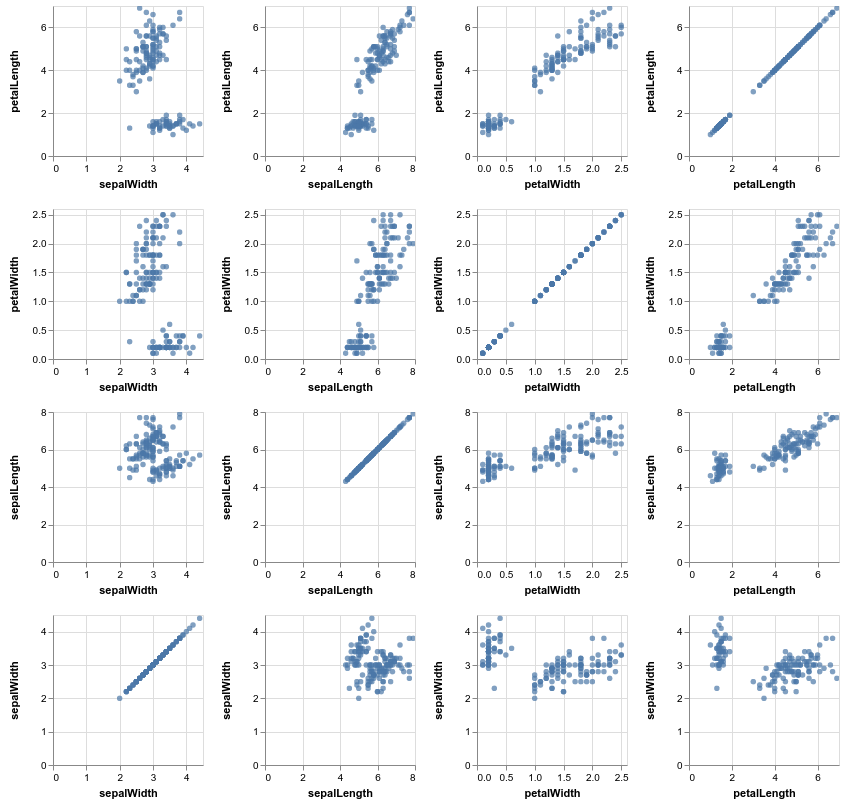

In [4]:
alt.Chart(iris_df).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
).properties(
    width=150,
    height=150
).repeat(
    row=['petalLength', 'petalWidth', 'sepalLength', 'sepalWidth'],
    column=['sepalWidth', 'sepalLength', 'petalWidth', 'petalLength']
).interactive()

## Clustering

Pregunta Crucial: 

¿Si no supiéramos que existen 3 tipos de Iris, seríamos capaces ***algorítmicamente*** de encontrar 3 tipos de flores?

## Clustering

* Se tienen datos sin etiquetar/agrupar.
* Se busca obtener un agrupamiento "natural" de los datos.
* No existen ejemplos de los cuales aprender: **método sin supervisar**.
* Fácil de verificar por inspección visual en 2D y 3D. 
* Difícil de verificar en dimensiones superiores.

## Ejemplo de Problemas de Clustering

* **Segmentación de mercado**: 
  * ¿Cómo atendemos mejor a nuestros clientes?
* **Ubicación de centros de reabastacimiento**: 
  * ¿Cómo minimizamos tiempos de entrega?
* **Compresión de imágenes**: 
  * ¿Cómo minimizamos el espacio destinado al almacenamiento?


## Ubicación centros de reabastecimiento
<img src="images/reabastecimiento1.png" width="500px" align="middle"/>

## Ubicación centros de reabastecimiento
<img src="images/reabastecimiento2.png" width="500px" align="middle"/>

## Compresión de Imágenes
Utilizando todos los colores:
<img src="images/colores.png" width="500px" align="middle"/>

## Compresión de Imágenes
Utilizando únicamente 32 colores:
<img src="images/colores_32means.png" width="500px" align="middle"/>

## Características de un Problema de Clustering

* **Datos de entrada**: Conjunto de inputs sin etiquetas.
* **Datos de salida**: Etiquetas para cada input.

Obs: La etiqueta/label típicamente se asocia a un entero (0,1,2, etc.) pero en realidad es cualquier variable categórica. 

## Algoritmos de Clustering
Buscan utilizar las propiedades inherentes presentes en los datos para organizarlos en grupos de máxima
similitud.

* Algoritmos basados en **conectividad**: Hierarchical Clustering.
* Algoritmos basados en **densidad**: Expectation Maximization
* Algoritmos basados en **centroides**: k-means.


## k-means

* **Input**: set $X$ de $N$ datos $x=(x_1, ..., x_n)$ y un meta-parámetro $k$ con el número de clusters a crear.

* **Output**: Set de $k$ centroides de clusters ($\mu_l$) y una etiquetación de cada dato $x$ en $X$ indicando a qué cluster pertenece.

$x_i$ y $\mu_l$ son vectores en $\mathcal{R}^m$.

La pertenencia es única. Todos los puntos dentro de un cluster se encuentran mas
cercanos en distancia al centroide de su cluster que al centroide de otro cluster.



## k-means

Matemáticamente:
\begin{align*}
\textrm{Minimizar } \sum_{l=1}^k \sum_{x_n \in C_l} ||x_n - \mu_l ||^2 \textrm{ respecto a } C_l, \mu_l. 
\end{align*}
Donde $C_l$ es el cluster l-ésimo.

El problema anterior es NP-hard (imposible de resolver en tiempo polinomial, del tipo más difícil de los probleams NP).



## Algoritmo de Lloyd
Heurística que converge en pocos pasos a un mínimo local.

### Procedimiento

* Calcular el centroide del cluster promediando las posiciones de los puntos actualmente en el cluster.

* Actualizar la pertenencia a los clusters utilizando la distancia más cercana a cada centroide.


## <span class="good">¿Cuándo funciona k-means?<span/>
 * Cuando los clusters son bien definidos y pueden separarse por círculos (n-esferas) de igual tamaño.

<img src="images/kmeans1.png" width="600px" align="middle"/>

<img src="images/kmeans2.png" width="600px" align="middle"/>


<img src="images/kmeans3.png" width="400px" align="middle"/>

<img src="images/kmeans4.png" width="400px" align="middle"/>

## <span class="bad">¿Cuándo falla k-means?<span/>
* Cuando se selecciona mal el número $k$ de clusters.
* Cuando no existe separación clara entre los clusters.
* Cuando los clusters son de tamaños muy distintos.
* Cuando la inicialización no es apropiada.

<img src="images/kmeans4.png" width="400px" align="middle"/>

<img src="images/kmeans5.png" width="600px" align="middle"/>

<img src="images/kmeans6.png" width="600px" align="middle"/>

## k-means

### <span class="good">Ventajas<span/>
* Rápido y sencillo de programar

### <span class="bad">Desventajas<span/>
* Trabaja en datos continuos, o donde distancias y promedios pueden definirse.
* Heurística depende del puntos iniciales.
* Requiere especificar el número de clusters $k$.
* No funciona correctamente en todos los casos de clustering, incluso conociendo $k$ correctamente.

## Ejemplos de k-means

In [5]:
import numpy as np
from scipy.linalg import norm

def find_centers(X, k, seed=None):
    if seed is None:
        seed = np.random.randint(42)
    np.random.seed(seed)
    # Initialize to K random centers
    old_centroids = random_centers(X, k)
    new_centroids = random_centers(X, k)
    while not has_converged(new_centroids, old_centroids):
        old_centroids = new_centroids
        # Assign all points in X to clusters
        clusters = cluster_points(X, old_centroids)
        # Reevaluate centers
        new_centroids = reevaluate_centers(X, clusters, k)
    return (new_centroids, clusters)


def random_centers(X, k):
    index = np.random.randint(0, X.shape[0], k)
    return X[index, :]


def has_converged(new_mu, old_mu, tol=1E-6):
    num = norm(np.array(new_mu)-np.array(old_mu))
    den = norm(new_mu)
    rel_error= num/den
    return rel_error < tol


def cluster_points(X, centroids):
    clusters = []
    for i, x in enumerate(X):
        distances = np.array([norm(x-cj) for cj in centroids])
        clusters.append( distances.argmin())
    return np.array(clusters)


def reevaluate_centers(X, clusters, k):
    centroids = []
    for j in range(k):
        cj = X[clusters==j,:].mean(axis=0)
        centroids.append(cj)
    return centroids

## Aplicación a datos

In [6]:
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs

def init_blobs(N, k, seed=42):
    X, y = make_blobs(n_samples=N, centers=k,
                      random_state=seed, cluster_std=0.60)
    return X

X = init_blobs(1000, 4, seed=40)
blobs = pd.DataFrame(X, columns=["x", "y"])
blobs.head()

,x,y
0,-1.527135,-9.502893
1,-0.891086,-7.530548
2,-1.157591,-3.037959
3,-1.637114,-8.955527
4,0.364620,2.225242


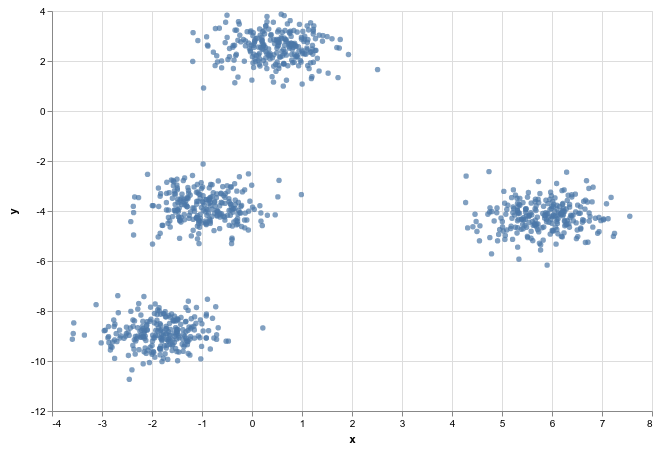

In [7]:
alt.Chart(blobs).mark_circle().encode(
    x="x",
    y="y"
).properties(
    width=600,
    height=400
)

In [8]:
centroids, clusters = find_centers(X, k=4, seed=1000000)
blobs["cluster"] = clusters
centroids_df = pd.DataFrame(centroids, columns=["x", "y"])

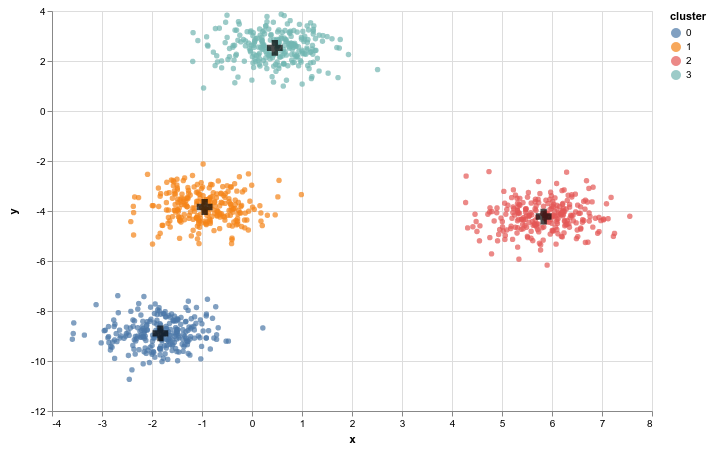

In [9]:
blobs_points = alt.Chart(blobs).mark_circle().encode(
    x="x",
    y="y",
    color="cluster:N"
).properties(
    width=600,
    height=400
)

blobs_centroids = alt.Chart(centroids_df).mark_point(size=250, fill="black", filled=True, fillOpacity=1, shape="cross").encode(
    x="x",
    y="y",
).properties(
    width=600,
    height=400
)

blobs_points + blobs_centroids

## ¿Es necesario reinventar la rueda?

Utilicemos la libreria sklearn.

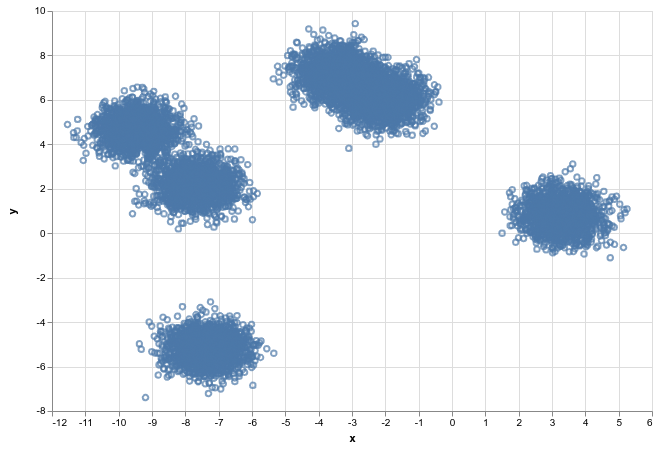

In [16]:
alt.data_transformers.enable('default', max_rows=10000)
from sklearn.cluster import KMeans

X = init_blobs(10000, 6, seed=43)
df = pd.DataFrame(X, columns=["x", "y"])
alt.Chart(df).mark_point().encode(
    x="x",
    y="y"
).properties(
    width=600,
    height=400
)

In [17]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_
df["cluster"] = clusters
centroids_df = pd.DataFrame(centroids, columns=["x", "y"])

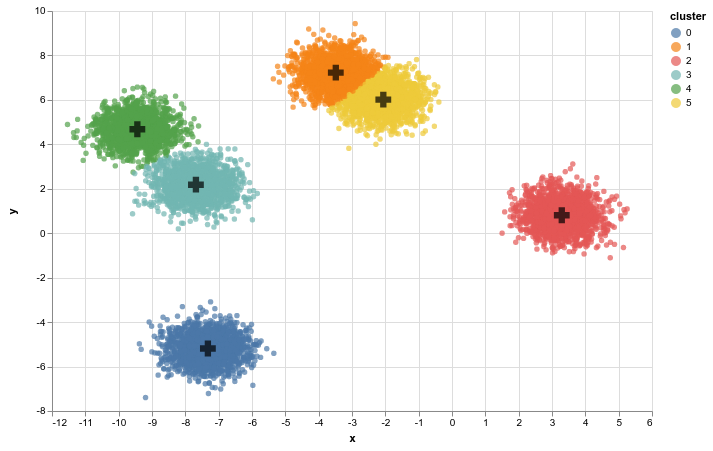

In [18]:
blobs_points = alt.Chart(df).mark_circle().encode(
    x="x",
    y="y",
    color="cluster:N"
).properties(
    width=600,
    height=400
)

blobs_centroids = alt.Chart(centroids_df).mark_point(size=250, fill="black", filled=True, fillOpacity=1, shape="cross").encode(
    x="x",
    y="y",
).properties(
    width=600,
    height=400
)

blobs_points + blobs_centroids

## ¿Cómo seleccionar k?

* Conocimiento previo de los datos.
* Prueba y error.
* Regla del codo (Elbow rule).
* *Estimating the number of clusters in a dataset via the gap statistic*, Tibshirani, Walther and Hastie (2001).
* *Selection of k in k-means*, Pham, Dimov y Nguyen (2004).

## Volviendo al Iris Dataset
Apliquemos k-means al Iris Dataset y calculemos el error de clasificación.
Mostremos el resultado utilizando la matriz de confusión.
<img src="images/predictionMatrix.png" alt="" width="900px" align="middle"/>

In [19]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Parameters
n_clusters = 3

# Loading the data
iris = datasets.load_iris()
X = iris.data
y_true = iris.target

# Running the algorithm
kmeans = KMeans(n_clusters)
kmeans.fit(X)
y_pred = kmeans.labels_

# Show the classificacion report
cm = confusion_matrix(y_true, y_pred)
print(cm)
print((np.diag(cm).sum() ) / float(cm.sum())) # 16/100

[[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]
0.09333333333333334


## Compresión de imágenes

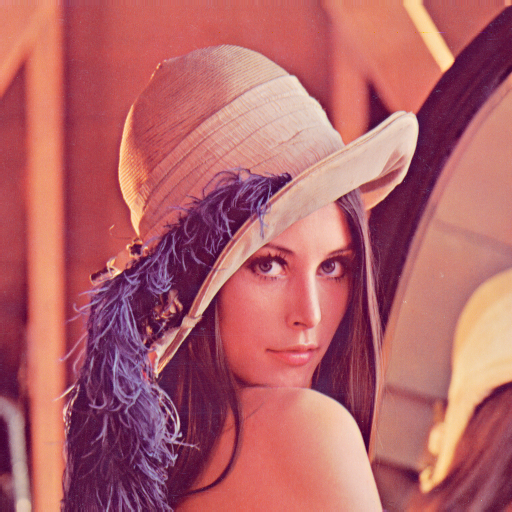

In [20]:
import os
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image

# Load image
im = Image.open(os.path.join("images", "lena.tiff"))
im

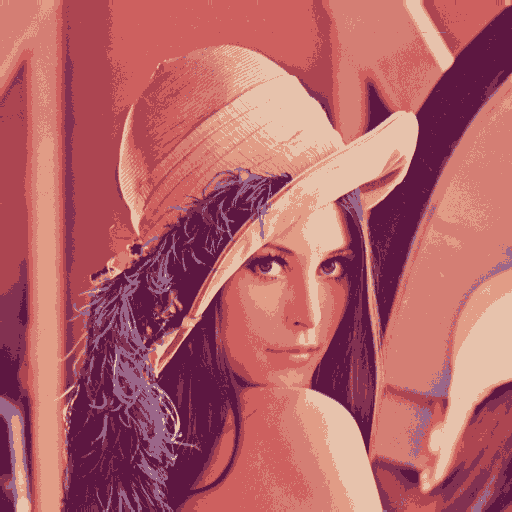

In [21]:
k = 8  # Number of clusters
X = np.array(im.getdata())  # Array with image values
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
compressed_array = kmeans.cluster_centers_[kmeans.predict(X)]  # Prediction 
im_compressed = compressed_array.astype(np.uint8).reshape(im.size[1], im.size[0], 3)  # New image
Image.fromarray(im_compressed, mode="RGB")

## Referencias

* Jake VanderPlas, ESAC Data Analysis and Statistics Workshop 2014, https://github.com/jakevdp/ESAC-stats-2014
* Andrew Ng, Machine Learning CS144, Stanford University.